In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [73]:
start = '2012-01-01'
end = '2022-12-01'
stock = 'AAPL'
data = yf.download(stock,start,end)

[*********************100%***********************]  1 of 1 completed


In [74]:
data.reset_index(inplace=True)

In [75]:
data

Price,Date,Adj Close,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
0,2012-01-03 00:00:00+00:00,12.402629,14.686786,14.732143,14.607143,14.621429,302220800
1,2012-01-04 00:00:00+00:00,12.469278,14.765714,14.810000,14.617143,14.642857,260022000
2,2012-01-05 00:00:00+00:00,12.607718,14.929643,14.948214,14.738214,14.819643,271269600
3,2012-01-06 00:00:00+00:00,12.739512,15.085714,15.098214,14.972143,14.991786,318292800
4,2012-01-09 00:00:00+00:00,12.719307,15.061786,15.276786,15.048214,15.196429,394024400
...,...,...,...,...,...,...,...
2742,2022-11-23 00:00:00+00:00,149.662338,151.070007,151.830002,149.339996,149.449997,58301400
2743,2022-11-25 00:00:00+00:00,146.729950,148.110001,148.880005,147.119995,148.309998,35195900
2744,2022-11-28 00:00:00+00:00,142.876205,144.220001,146.639999,143.380005,145.139999,69246000


In [76]:
ma_100_days =data.Close.rolling(100).mean()

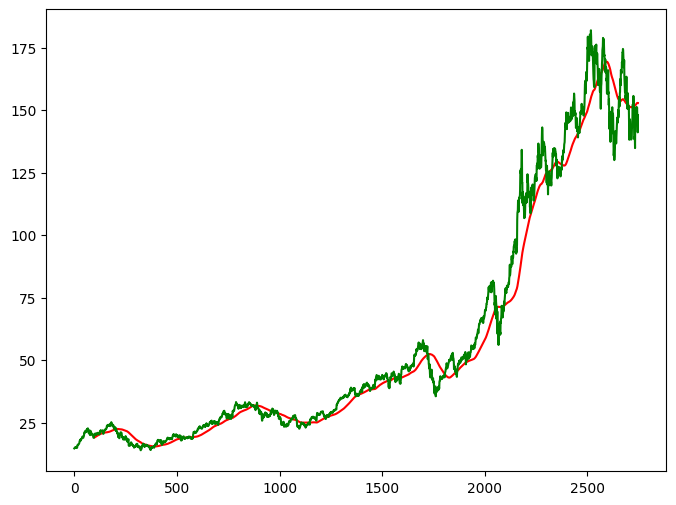

In [77]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days,'r')
plt.plot(data.Close,'g')
plt.show()

In [78]:
ma_200_days =data.Close.rolling(200).mean()

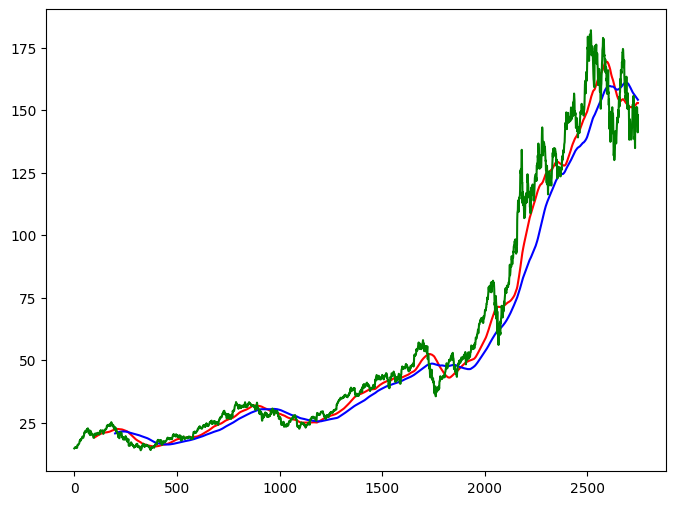

In [79]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days,'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [80]:
data.dropna(inplace=True)

In [81]:
data_train=pd.DataFrame(data.Close[0:int(len(data)*0.80)])
data_test=pd.DataFrame(data.Close[int(len(data)*0.80):len(data)])

In [82]:
data_train.shape[0]

2197

In [83]:
data_test.shape[0]

550

In [84]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [85]:
data_train_scale=scaler.fit_transform(data_train)

In [86]:
x=[]
y=[]
for i in range(100,data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])

In [87]:
x, y = np.array(x), np.array(y)

In [88]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [89]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))

c:\Users\ashut\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [90]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [91]:
model.fit(x,y, epochs = 50, batch_size =32, verbose =1)

Epoch 1/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 9s 83ms/step - loss: 0.0225
Epoch 2/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 6s 86ms/step - loss: 0.0037
Epoch 3/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 6s 88ms/step - loss: 0.0028
Epoch 4/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - loss: 0.0028
Epoch 5/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 5s 81ms/step - loss: 0.0022
Epoch 6/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 6s 88ms/step - loss: 0.0020
Epoch 7/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 6s 86ms/step - loss: 0.0024
Epoch 8/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 6s 93ms/step - loss: 0.0018
Epoch 9/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 6s 94ms/step - loss: 0.0018
Epoch 10/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 6s 93ms/step - loss: 0.0025
Epoch 11/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 6s 89ms/step - loss: 0.0018
Epoch 12/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 6s 90ms/step - loss: 0.0017
Epoch 13/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 6s 95ms/step - loss: 0.0015
Epoch 14/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 6s 91ms/step - loss: 0.0016
Epoch 15/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 6s 97ms/step - loss: 0.0011
Epoc

In [92]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_10 (LSTM)                  │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_11 (LSTM)                  │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [93]:
pas_100_days = data_train.tail(100)

In [94]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [95]:
data_test_scale  =  scaler.fit_transform(data_test)

In [96]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

In [97]:
y_predict = model.predict(x)

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step


In [98]:
scale =1/scaler.scale_

In [99]:
y_predict = y_predict*scale

In [100]:
y = y*scale

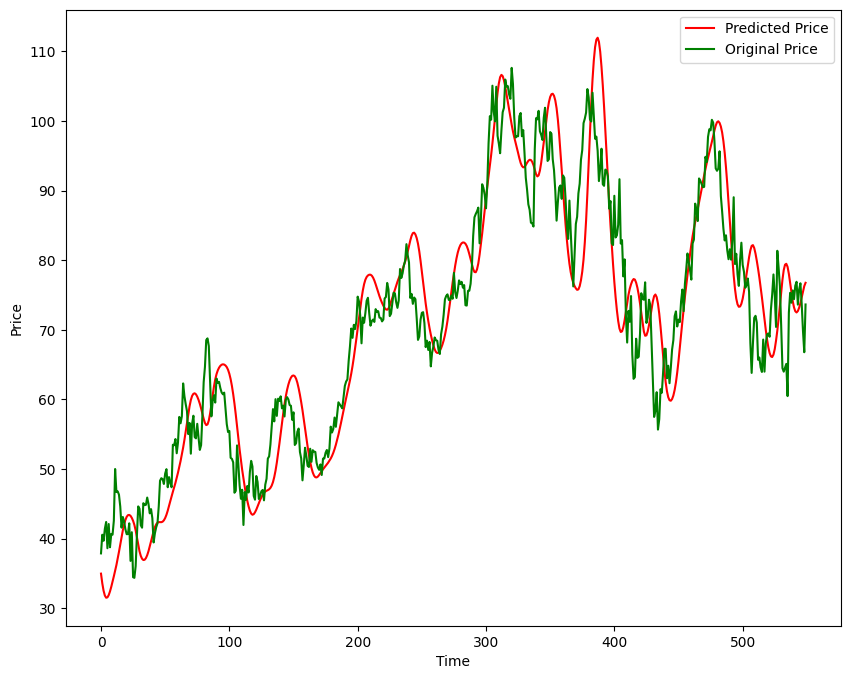

In [101]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [102]:
model.save('Stock Predictions Model.keras')